# 1. Постановка задачи
Численно решить задачу Коши:
$$
    \begin{cases}
        \displaystyle \frac{d^2 y}{dt^2}(t^2 + 1)=\frac{d y}{dt}2t, \\
        \displaystyle y|_{t=0} = 1,\\
        \displaystyle \frac{d y}{dt}\bigg|_{t=0}= 3,\\
    \end{cases}
$$

методом Эйлера и методом Рунге-Кутта, результаты сравнить с аналитическим решением.
# 2. Аналитическое решение
Дважды проинтегрировав исходное уравнение, несложно получить аналитическое решение: 
$$
    y=t^3+3t+1
$$

<IPython.core.display.Javascript object>


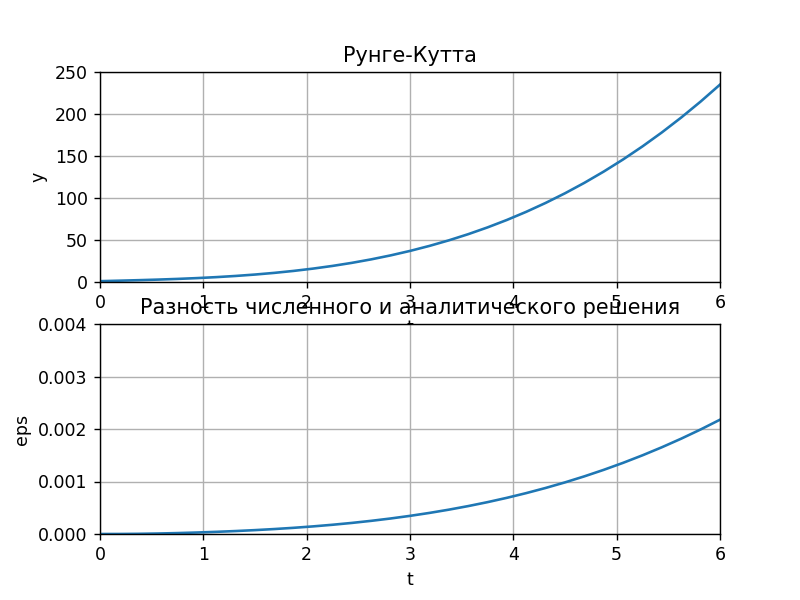

<IPython.core.display.Javascript object>


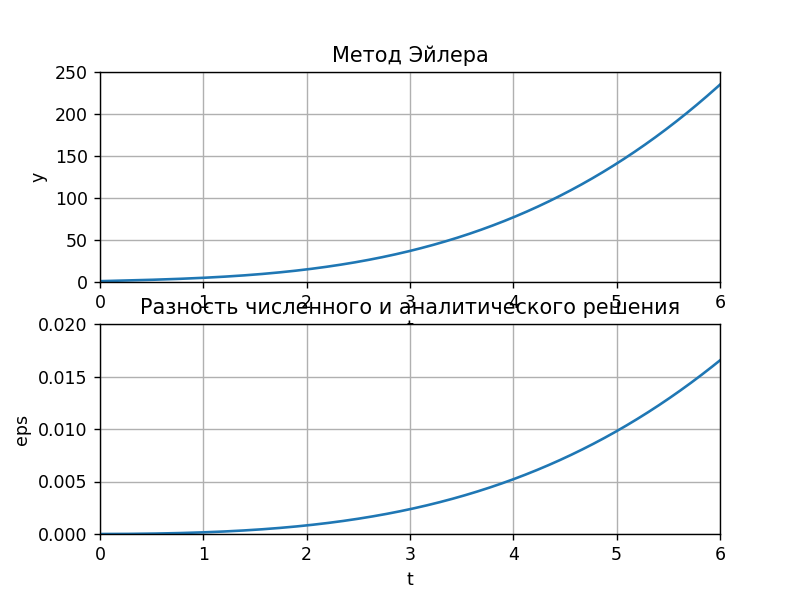

Для метода Рунге-Кутта понадобилось  4  удвоений разбиения, шаг по времени составил  0.1875
Для метода Эйлера понадобилось  16  удвоений разбиения, шаг по времени составил  4.57763671875e-05


In [16]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


#xInit - начальные условия (x0, y0)
#tMin, tMax - границы временного интервала
#epsilon - допустимая погрешность
#stepTotalInit - начальное количество отрезков, на которые будет разбит интервал, не меньше двух
xInit = np.array([3, 1])
tMin = 0
tMax = 6
epsilon = 0.01
stepTotalInit = 2

#функция скорости, х — координаты в формате (x1, x2,..., y), в нашем случае - (x, y)
#возвращает (v1, v2,..., vy)
def F(x, t):
    return np.array([x[0]*2*t/(t**2 + 1), x[0]])
       
# расчёт коэффициентов для метода Рунге-Кутта
# func - функция скорости, xCurrent tCurrent - координаты и время в точке расчёт, step - длина шага по времени
# возвращает массив коэффициентов
def RungeKuttaKoeff(func, xCurrent, tCurrent, step):    
    k1 = func(xCurrent, tCurrent)
    k2 = func(xCurrent + step/2*k1, tCurrent + step/2)
    k3 = func(xCurrent + step/2*k2, tCurrent + step/2)
    k4 = func(xCurrent + step*k3, tCurrent + step)
    return np.array([k1, k2, k3, k4])

# расчёт приращения координат за шаг для метода Р-К
# func - функция скорости, xCurrent tCurrent - координаты и время в точке расчёт, step - длина шага по времени
# возврашает приращение координат
def RKIncr(func, xCurrent, tCurrent, step):
    keys = RungeKuttaKoeff(func, xCurrent, tCurrent, step)
    return step/6*(keys[0] + 2*keys[1] + 2*keys[2] + keys[3])

# func - функция скорости
#xInit - начальные условия (x0, y0)
#tMin, tMax - границы временного интервала
#epsilon - допустимая погрешность
#stepTotalInit - начальное количество отрезков, на которые будет разбит интервал 
# возвращает [[значения у в узлах], np.array([сетка по времени]), длина шага, количество удвоений]
def RungeKutta(func, xInit, tMin, tMax, epsilon, stepTotalInit):
    
    # stepTotal - количество отрезков на данном шаге
    # step - длина отрезка
    stepTotal = stepTotalInit
    step = abs(tMin - tMax)/stepTotal
    # counter - счётчик удвоения разбиения
    counter = 0
    # инициализация xList1 - массива значений сеточной функции при шаге "h" 
    xList1 = [xInit,]
    # grid_t - сетка для времени
    grid_t = np.linspace(tMin, tMax, stepTotal+1)
    
    # расчёт значений сеточной функции с изначальным шагом
    for i in range (0, stepTotal):
            xList1.append(xList1[i] + RKIncr(func, xList1[i], grid_t[i], step))
    
    # diff - значение нормы разности сеточных функций
    diff = 0
    
    # цикл работает, пока условие Рунге не выполнится для всех точек сетки, 
    # цикл сработает хотя бы 1 раз (проверяется по counter)
    while ((diff/15 > epsilon) or (counter==0)):
        counter += 1
        diff = 0
        # удвоение разбиения
        stepTotal = stepTotal*2
        step = abs(tMin - tMax)/stepTotal
        grid_t = np.linspace(tMin, tMax, stepTotal+1)
        
        # xList0 - массив значений сеточной функции с шагом "2h", xList1 - "h"
        xList0 = xList1
        xList1 = [xInit,]
        # собственно, расчёт
        for i in range (0, stepTotal):
            xList1.append(xList1[i] + RKIncr(func, xList1[i], grid_t[i], step))
            # расчёт нормы разности функций
            if i%2 == 0:
                diff = max(diff, np.amax(np.abs(xList0[i//2]-xList1[i])))
    # yRes - значения y в узлах сетки            
    yRes = [each[-1] for each in xList1]
    # возвращает [[значения у в узлах], np.array([сетка по времени]), длина шага, количество удвоений]
    return [yRes, grid_t, step, counter]
    




def EulerAdaptive(func, xInit, tMin, tMax, epsilon, stepTotalInit):  
    # stepTotal - количество отрезков на данном шаге
    # step - длина отрезка
    stepTotal = stepTotalInit
    step = abs(tMin - tMax)/stepTotal
    # counter - счётчик удвоения разбиения
    counter = 0
    # инициализация xList1 - массива значений сеточной функции при шаге "h" 
    xList1 = [xInit,]
    # grid_t - сетка для времени
    grid_t = np.linspace(tMin, tMax, stepTotal+1)
    
    # расчёт значений сеточной функции с изначальным шагом
    for i in range (0, stepTotal):
            xList1.append(xList1[i] + step*func(xList1[i], grid_t[i]))
            
    # diff - значение нормы разности сеточных функций
    diff = 0
    
    # цикл работает, пока условие Рунге не выполнится для всех точек сетки, 
    # цикл сработает хотя бы 1 раз (проверяется по counter)
    while ((diff/3 > epsilon) or (counter==0)):
        counter += 1
        diff = 0
        # удвоение разбиения
        stepTotal = stepTotal*2
        step = abs(tMin - tMax)/stepTotal
        grid_t = np.linspace(tMin, tMax, stepTotal+1)
        
        # xList0 - массив значений сеточной функции с шагом "2h", xList1 - "h"
        xList0 = xList1
        xList1 = [xInit,]
        # собственно, расчёт
        for i in range (0, stepTotal):
            xList1.append(xList1[i] + step*func(xList1[i], grid_t[i]))
            # расчёт нормы разности функций
            if i%2 == 0:
                diff = max(diff, np.amax(np.abs(xList0[i//2]-xList1[i])))
    # yRes - значения y в узлах сетки            
    yRes = [each[-1] for each in xList1]
    # возвращает [[значения у в узлах], np.array([сетка по времени]), длина шага, количество удвоений]
    return [yRes, grid_t, step, counter]

# данные для Рунге-Кутта: 
RKResults = RungeKutta(F, xInit, tMin, tMax, epsilon, stepTotalInit)
# аналитическое решение в узлах сетки
RKAnalitic = RKResults[1]**3 + RKResults[1]*3 + 1
RKEps = RKAnalitic - RKResults[0]


EulerResults = EulerAdaptive(F, xInit, tMin, tMax, epsilon, stepTotalInit)
# аналитическое решение в узлах сетки
EulerAnalitic = EulerResults[1]**3 + EulerResults[1]*3 + 1
EulerEps = EulerAnalitic - EulerResults[0]

# графики решения и разности численного и аналитического решения
fig1 = plt.figure()
fig1Sub1 = fig1.add_subplot(211)
plt.ylim(0, 250)
plt.xlim(tMin, tMax)
plt.plot(RKResults[1], RKResults[0])
plt.title('Рунге-Кутта')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

fig1Sub2 = fig1.add_subplot(212)
plt.ylim(0, 0.004)
plt.xlim(tMin, tMax)
plt.plot(RKResults[1], RKEps)
plt.title('Разность численного и аналитического решения')
plt.xlabel('t')
plt.ylabel('eps')
plt.grid(True)


fig2 = plt.figure()
fig2Sub1 = fig2.add_subplot(211)
plt.ylim(0, 250)
plt.xlim(tMin, tMax)
plt.plot(EulerResults[1], EulerResults[0])
plt.title('Метод Эйлера')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

fig2Sub2 = fig2.add_subplot(212)
plt.ylim(0, 0.02)
plt.xlim(tMin, tMax)
plt.plot(EulerResults[1], EulerEps)
plt.title('Разность численного и аналитического решения')
plt.xlabel('t')
plt.ylabel('eps')
plt.grid(True)

plt.show()

print("Для метода Рунге-Кутта понадобилось ", RKResults[-1], " удвоений разбиения, шаг по времени составил ", RKResults[-2])
print("Для метода Эйлера понадобилось ", EulerResults[-1], " удвоений разбиения, шаг по времени составил ", EulerResults[-2])

Нетрудно заметить, что метод Рунге-Кутта не только точнее, но и менее требователен к величине шага.